In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
horse_df = pd.read_csv("D:\SimpliLearn\Machine+Learning\Course Components\Assisted Practice\Lesson 5\Horse.csv")

In [3]:
horse_df.shape

(299, 28)

In [4]:
horse_df.head(5)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [5]:
horse_df.head(5).T

,0,1,2,3,4
surgery,no,yes,no,yes,no
age,adult,adult,adult,young,adult
hospital_number,530101,534817,530334,5290409,530255
rectal_temp,38.5,39.2,38.3,39.1,37.3
pulse,66,88,40,164,104
respiratory_rate,28,20,24,84,35
temp_of_extremities,cool,NaN,normal,cold,NaN
peripheral_pulse,reduced,NaN,normal,normal,NaN
mucous_membrane,NaN,pale_cyanotic,pale_pink,dark_cyanotic,dark_cyanotic
capillary_refill_time,more_3_sec,less_3_sec,less_3_sec,more_3_sec,more_3_sec


In [6]:
horse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

**Check for null values**

In [7]:
horse_df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

**From above, we can infer that the numeric columns with null values are:**

- rectal_temp float64
- pulse float64
- respiratory_rate float64
- packed_cell_volume float64
- total_protein float64
- nasogastric_reflux_ph float64
- abdomo_protein float64

In [8]:
#code to print out all the columns that have missing values 
for i in horse_df.columns:
    if horse_df[i].hasnans:
        print("***",i,"***")
        print(horse_df[i].dtype)
        print("----------------")

*** rectal_temp ***
float64
----------------
*** pulse ***
float64
----------------
*** respiratory_rate ***
float64
----------------
*** temp_of_extremities ***
object
----------------
*** peripheral_pulse ***
object
----------------
*** mucous_membrane ***
object
----------------
*** capillary_refill_time ***
object
----------------
*** pain ***
object
----------------
*** peristalsis ***
object
----------------
*** abdominal_distention ***
object
----------------
*** nasogastric_tube ***
object
----------------
*** nasogastric_reflux ***
object
----------------
*** nasogastric_reflux_ph ***
float64
----------------
*** rectal_exam_feces ***
object
----------------
*** abdomen ***
object
----------------
*** packed_cell_volume ***
float64
----------------
*** total_protein ***
float64
----------------
*** abdomo_appearance ***
object
----------------
*** abdomo_protein ***
float64
----------------


In [9]:
#code to print out only the object type columns that have missing values
for i in horse_df.columns:
    if horse_df[i].hasnans:
        if horse_df[i].dtype == "object":
            print("***",i,"***")
            print("----------------")

*** temp_of_extremities ***
----------------
*** peripheral_pulse ***
----------------
*** mucous_membrane ***
----------------
*** capillary_refill_time ***
----------------
*** pain ***
----------------
*** peristalsis ***
----------------
*** abdominal_distention ***
----------------
*** nasogastric_tube ***
----------------
*** nasogastric_reflux ***
----------------
*** rectal_exam_feces ***
----------------
*** abdomen ***
----------------
*** abdomo_appearance ***
----------------


In [10]:
for i in horse_df.columns:
    if horse_df[i].hasnans:
        if horse_df[i].dtype == "float64":
            print("***",i,"***")
            print(horse_df[i].dtype)
            print(horse_df[i].isnull().sum())        
            print("----------------")

*** rectal_temp ***
float64
60
----------------
*** pulse ***
float64
24
----------------
*** respiratory_rate ***
float64
58
----------------
*** nasogastric_reflux_ph ***
float64
246
----------------
*** packed_cell_volume ***
float64
29
----------------
*** total_protein ***
float64
33
----------------
*** abdomo_protein ***
float64
198
----------------


In [11]:
for i in horse_df.columns:
    if horse_df[i].hasnans:
        if horse_df[i].dtype == "object":
            print("***",i,"***")
            print(horse_df[i].dtype)
            print(horse_df[i].isnull().sum())        
            print("----------------")

*** temp_of_extremities ***
object
56
----------------
*** peripheral_pulse ***
object
69
----------------
*** mucous_membrane ***
object
47
----------------
*** capillary_refill_time ***
object
32
----------------
*** pain ***
object
55
----------------
*** peristalsis ***
object
44
----------------
*** abdominal_distention ***
object
56
----------------
*** nasogastric_tube ***
object
104
----------------
*** nasogastric_reflux ***
object
106
----------------
*** rectal_exam_feces ***
object
102
----------------
*** abdomen ***
object
118
----------------
*** abdomo_appearance ***
object
165
----------------


In [12]:
for i in horse_df.columns:
    if horse_df[i].hasnans:
        if horse_df[i].isnull().sum() >= 150:
            print("***",i,"***")
            print(horse_df[i].dtype)
            print(horse_df[i].isnull().sum())        
            print("----------------")

*** nasogastric_reflux_ph ***
float64
246
----------------
*** abdomo_appearance ***
object
165
----------------
*** abdomo_protein ***
float64
198
----------------


In [13]:
horse_df.shape[1]

28

- From above, we infer that the columns- "nasogastric_reflux_ph ","abdomo_appearance" and "abdomo_protein" contain null values of about more than 50% of the total number records.
- Hence, we remove these columns from further analysis.

In [14]:
horse_df_new = horse_df.drop(["nasogastric_reflux_ph","abdomo_appearance","abdomo_protein"],axis=1)
horse_df_new.shape

(299, 25)

**Let us impute the null values in the numerical columns**

In [20]:
horse_df_new.rectal_temp.mean()

38.168619246861994

In [15]:
for i in horse_df_new.columns:
    if horse_df_new[i].hasnans:
        if horse_df_new[i].dtype == "float64":
            horse_df_new[i].fillna(horse_df_new[i].mean(),inplace=True)
            print("***",i,"***")
            print(horse_df_new[i].isnull().sum())
            print("-------------------------")

*** rectal_temp ***
0
-------------------------
*** pulse ***
0
-------------------------
*** respiratory_rate ***
0
-------------------------
*** packed_cell_volume ***
0
-------------------------
*** total_protein ***
0
-------------------------


**Let us impute the null values in the categorical columns**

In [18]:
horse_df_new.temp_of_extremities.mode()

0    cool
dtype: object

In [19]:
horse_df_new.temp_of_extremities.mode()[0]

'cool'

In [21]:
for i in horse_df_new.columns:
    if horse_df_new[i].hasnans:
        if horse_df_new[i].dtype == "object":
            horse_df_new[i].fillna(horse_df_new[i].mode()[0],inplace=True)
            print("***",i,"***")
            print(horse_df_new[i].isnull().sum())
            print("-------------------------")

*** temp_of_extremities ***
0
-------------------------
*** peripheral_pulse ***
0
-------------------------
*** mucous_membrane ***
0
-------------------------
*** capillary_refill_time ***
0
-------------------------
*** pain ***
0
-------------------------
*** peristalsis ***
0
-------------------------
*** abdominal_distention ***
0
-------------------------
*** nasogastric_tube ***
0
-------------------------
*** nasogastric_reflux ***
0
-------------------------
*** rectal_exam_feces ***
0
-------------------------
*** abdomen ***
0
-------------------------


In [22]:
horse_df_new.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

From above, we can infer that the null values present in all the columns have been imputated with the appropriate values. 

**Check the class distribution in the Output column**

In [23]:
horse_df_new.outcome.value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

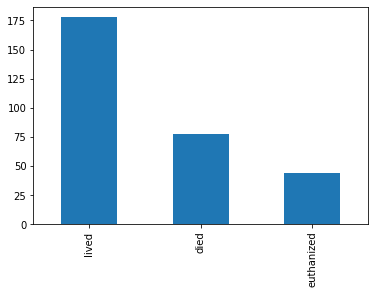

In [24]:
horse_df_new.outcome.value_counts().plot.bar()

From above, we can infer that there is a class imbalance in the "Outcome" column.

**Let us encode all the categorical columns in our dataset**
- we use OHE to encode all the categorical features
- we use Label encoder to encode all the categorical output column

In [26]:
# Split our dataset into X & y

X = horse_df_new.drop("outcome", axis=1)
y = horse_df_new.outcome

In [27]:
X.shape

(299, 24)

In [28]:
# One Hot Encoding the categorical features
X_encoded = pd.get_dummies(X)
X_encoded.shape

(299, 62)

In [31]:
X_encoded.head(5)

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3,surgery_no,...,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530101,38.5,66.0,28.0,45.0,8.4,11300,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,534817,39.2,88.0,20.0,50.0,85.0,2208,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,530334,38.3,40.0,24.0,33.0,6.7,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,5290409,39.1,164.0,84.0,48.0,7.2,2208,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,530255,37.3,104.0,35.0,74.0,7.4,4300,0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [32]:
# Label Encode our target column
from sklearn.preprocessing import LabelEncoder 

In [33]:
horse_outcome_encoder = LabelEncoder() # instantiating the Label Encoder object

y_encoded = horse_outcome_encoder.fit_transform(y)

print(y_encoded)

[0 1 2 0 0 2 2 0 1 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 1 2 2 2 1 1
 2 2 0 0 2 2 1 1 0 2 2 0 0 2 0 2 2 1 0 2 0 0 0 2 2 0 1 2 2 2 2 2 2 1 2 0 0
 0 1 2 2 0 2 0 2 2 0 2 2 0 1 2 2 2 0 2 0 2 2 2 1 2 2 2 1 2 2 0 2 2 2 1 0 0
 2 2 0 2 2 2 1 2 2 2 1 2 0 1 2 2 2 1 2 0 0 2 0 0 0 2 2 2 2 0 0 2 1 2 2 0 2
 2 2 0 2 2 2 2 2 1 2 2 2 0 2 1 2 1 2 2 2 1 2 0 2 0 0 2 2 0 2 1 0 2 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 0 2 2 2 0 1 2 2 1 2 0 1 2 0 0 2 2 2 2 2 2 1 2 1 2 2
 2 2 2 0 2 1 2 2 0 2 2 2 0 2 2 1 1 0 2 0 2 2 0 2 0 2 2 1 0 0 2 2 0 1 0 2 0
 2 2 2 0 2 1 2 2 2 2 0 2 2 0 1 0 1 2 2 2 2 0 0 2 2 2 1 2 2 2 2 0 0 1 2 1 1
 0 2 1]


We can infer from the principles of a label encoder that
- 0 - dies
- 1 - euthanized
- 2 - lived

**SMOTE - Synthetic Minority Oversampling Technique**


Oversampling - More data points for the classes with the lesser representation are synthetically(statistically) created using oversampling techniques like SMOTE.

Use the below command to install the imblearn library
- !pip install imbalanced-learn

In [25]:
import imblearn
print(imblearn.__version__)

0.7.0


In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
oversampler = SMOTE() # instantiating the object for SMOTE method
X_smote, y_smote = oversampler.fit_resample(X_encoded,y_encoded) #always pass both the X & y values

In [36]:
print("Before oversampling, the total number of datapoints were:")
print(X_encoded.shape[0])
print("After oversampling, the total number of datapoints were:")
print(X_smote.shape[0])

Before oversampling, the total number of datapoints were:
299
After oversampling, the total number of datapoints were:
534


In [38]:
pd.Series(y_encoded).value_counts()

2    178
0     77
1     44
dtype: int64

In [39]:
pd.Series(y_smote).value_counts()

2    178
1    178
0    178
dtype: int64

From above, we can infer that the problem of imbalanced class representation in the dataset has been fixed.

**Split the dataset into train and test sets**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state= 5)

In [41]:
print("No. of data points in the training dataset is", X_train.shape[0])
print("No. of data points in the testing dataset is",X_test.shape[0])

No. of data points in the training dataset is 373
No. of data points in the testing dataset is 161


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc_model = RandomForestClassifier(n_estimators=110)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=110)

In [44]:
y_test_pred_rfc = rfc_model.predict(X_test)
y_train_pred_rfc = rfc_model.predict(X_train)

**Evaluating our Knn model**

In [45]:
print("The accuracy score of the RFC model on the test dataset is", accuracy_score(y_test,y_test_pred_rfc))

The accuracy score of the RFC model on the test dataset is 0.8881987577639752


In [47]:
print("The accuracy score of the RFC model on the train dataset is", accuracy_score(y_train,y_train_pred_rfc))

The accuracy score of the RFC model on the train dataset is 1.0


**After class assignment**
- 1. Experiment with building the RFC model directly with the X_encoded and y_encoded data (i.e) without oversampling and write down your observations.
- 2. Experiment with different values for the n_estimators parameter and write down your observations on RFC model performance.

# End of discussion